## Introduction 

In this project we will try to learn how to work with RNNs in Keras. We will mostly follow Chapter 15 of Aurelion Geron's book on Machine Leraning (2nd Ed.). Note that we had already learnt how to use RNNs in pytorch through Udacity's course on  Introduction to Deep Learning with PyTorch. Our aim here will be to do the same in Keras. 

## Generating train and test sequences 

We will use a simple sine wave to produce our sequences

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
time_steps=np.arange(0, 5002*np.pi, np.pi/100 )
time_steps

array([0.00000000e+00, 3.14159265e-02, 6.28318531e-02, ...,
       1.57141522e+04, 1.57141836e+04, 1.57142150e+04])

In [4]:
series = np.sin(time_steps).reshape(-1,1)
series

array([[ 0.        ],
       [ 0.03141076],
       [ 0.06279052],
       ...,
       [-0.09410831],
       [-0.06279052],
       [-0.03141076]])

In [5]:
series.shape

(500200, 1)

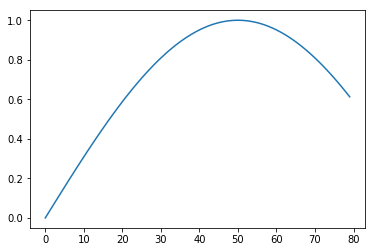

In [6]:
plt.plot(series[:80])
plt.show()

We now wish to convert this into 50 batches. Each consisting of 20 sequences with each sequence consisting of 50 time steps. For this we will first reshape our data to be a 2d array with 20 rows, then we will use a sliding window of size 50 to divide the sequence into batches

In [7]:
series.size

500200

In [8]:
series=series.reshape(20,-1,1)
series.shape

(20, 25010, 1)

In [9]:
# the column index at which each new batch starts
start_idx=np.arange(0,2500,50)
start_idx

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600,
       1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150,
       2200, 2250, 2300, 2350, 2400, 2450])

In [10]:
start_idx.size

50

In [11]:
# extracting the input sequences
x_batches=[]
for idx in start_idx:
    batch=series[:, idx: idx+50, :]
    x_batches.append(batch)

In [12]:
# checking that all the batches have the correct shape
ctr=1
for batch in x_batches:
    print("batch: {} shape: {}".format(ctr, batch.shape))
    ctr+=1  

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

In [13]:
# extracting the output sequences
# these are same as input sequences shifted by 1 time_step
y_batches=[]
for idx in start_idx:
    batch=series[:,idx+1:idx+51,:]
    y_batches.append(batch)

In [14]:
# making sure all the y_batches have the correct shape
ctr=1
for batch in y_batches:
    print('batch: {} shape: {}'.format(ctr, batch.shape))
    ctr+=1

batch: 1 shape: (20, 50, 1)
batch: 2 shape: (20, 50, 1)
batch: 3 shape: (20, 50, 1)
batch: 4 shape: (20, 50, 1)
batch: 5 shape: (20, 50, 1)
batch: 6 shape: (20, 50, 1)
batch: 7 shape: (20, 50, 1)
batch: 8 shape: (20, 50, 1)
batch: 9 shape: (20, 50, 1)
batch: 10 shape: (20, 50, 1)
batch: 11 shape: (20, 50, 1)
batch: 12 shape: (20, 50, 1)
batch: 13 shape: (20, 50, 1)
batch: 14 shape: (20, 50, 1)
batch: 15 shape: (20, 50, 1)
batch: 16 shape: (20, 50, 1)
batch: 17 shape: (20, 50, 1)
batch: 18 shape: (20, 50, 1)
batch: 19 shape: (20, 50, 1)
batch: 20 shape: (20, 50, 1)
batch: 21 shape: (20, 50, 1)
batch: 22 shape: (20, 50, 1)
batch: 23 shape: (20, 50, 1)
batch: 24 shape: (20, 50, 1)
batch: 25 shape: (20, 50, 1)
batch: 26 shape: (20, 50, 1)
batch: 27 shape: (20, 50, 1)
batch: 28 shape: (20, 50, 1)
batch: 29 shape: (20, 50, 1)
batch: 30 shape: (20, 50, 1)
batch: 31 shape: (20, 50, 1)
batch: 32 shape: (20, 50, 1)
batch: 33 shape: (20, 50, 1)
batch: 34 shape: (20, 50, 1)
batch: 35 shape: (20, 5

Next, we will compare the input and the output of a random sequence

In [15]:
x=x_batches[23][5]
x[:6]

array([[2.64669788e-13],
       [3.14107591e-02],
       [6.27905195e-02],
       [9.41083133e-02],
       [1.25333234e-01],
       [1.56434465e-01]])

In [16]:
y=y_batches[23][5]
y[:5]

array([[0.03141076],
       [0.06279052],
       [0.09410831],
       [0.12533323],
       [0.15643447]])

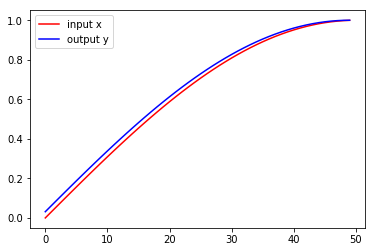

In [17]:
plt.plot(x, 'r', label='input x')
plt.plot(y, 'b', label='output y')
plt.legend()
plt.show()

We see that indeed the sequence in y is shifted from that in x by a single time step. 

## Split into training and validation sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# train_size = 70%
seed = 42
train_size = 0.7
X_train, X_val, y_train, y_val = train_test_split(x_batches, y_batches, train_size=train_size, random_state=True )

C:\Users\agarw\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
# validation size = 15% of the total data
# this is equivalent to 50% of the remaining sequences after extracting the training data
val_size = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, train_size=val_size, random_state=True )

In [21]:
# number of batches in training and test sequences
print('num x_batches_train: {}'.format(len(X_train)))
print('num y_batches_train: {}'.format(len(y_train)))
print('num x_batches_val: {}'.format(len(X_val)))
print('num y_batches_val: {}'.format(len(y_val)))
print('num x_batches_test: {}'.format(len(X_test)))
print('num y_batches_test: {}'.format(len(y_test)))

num x_batches_train: 35
num y_batches_train: 35
num x_batches_val: 7
num y_batches_val: 7
num x_batches_test: 8
num y_batches_test: 8


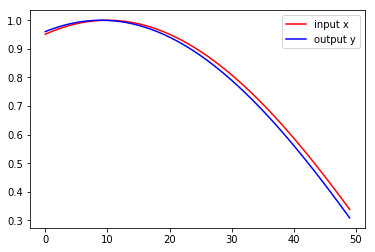

In [22]:
# compare the input and the output sequences of a random sequence in training batches
x = X_train[17][14]
y = y_train[17][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

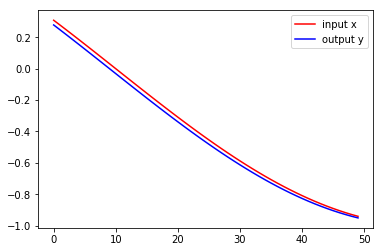

In [23]:
# compare the input and the output sequences of a random sequence in validation batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

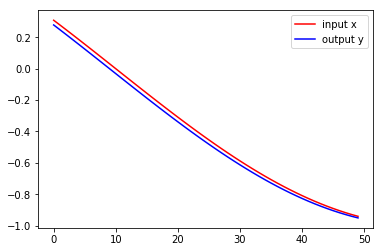

In [24]:
# compare the input and the output sequences of a random sequence in test batches
x = X_val[6][14]
y = y_val[6][14]
plt.plot(x, 'r', label = 'input x')
plt.plot(y, 'b', label = 'output y')
plt.legend()
plt.show()

## Building a single neuron simple RNN

Having prepared our data, let us now import and train the Simple RNN provided by keras on these sequences. The relevant documentation for SimpleRNN can be found [here](https://keras.io/layers/recurrent/).

In [25]:
from keras.models import Sequential
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [26]:
# A 1 layer RNN with a single neuron
# if we wish to get the output of each time_step, we must set
# return_sequences=True 
# the sequence can be of any length => input shape is [None, 1]
# since this is a simple RNN with just 1 neuron, it will be unfair to be able to learn to correctly predict the output for each time_step
# therefore for now will only predict the expected value at the end of the sequence
simpleRNN = Sequential([SimpleRNN(units = 1, input_shape= [None, 1], 
                                  return_sequences = False)] )

Instructions for updating:
Colocations handled automatically by placer.


### compile, fit and evaluate the model

In [27]:
optimizer='adam'
simpleRNN.compile(optimizer = optimizer, loss = 'mse')

In [28]:
# let's check the output of the simpleRNN on a single sequence before training
y_pred=simpleRNN.predict(X_train[17][14].reshape(1,50,1))

In [29]:
y_pred.shape

(1, 1)

I just realized that I did not need to split my data into batches and can just pass the batch_size to model.fit() in keras

In [30]:
# joining all the batches in X_train
X_train=np.array(X_train).reshape(-1,50,1)
X_train.shape

(700, 50, 1)

In [31]:
# joining all the batches in y_train
y_train = np.array(y_train).reshape(-1,50,1)
y_train.shape

(700, 50, 1)

In [32]:
# extracting the last value in the prediction sequence
y_true_train=y_train[:,-1]
y_true_train.shape

(700, 1)

In [33]:
# joining all the validation batches
X_val = np.array(X_val).reshape(-1,50,1)
y_val = np.array(y_val).reshape(-1,50,1)
print('X_val shape: {}, y_val_shape: {}'.format(X_val.shape, y_val.shape))

X_val shape: (140, 50, 1), y_val_shape: (140, 50, 1)


In [34]:
# extracting the expected value at the end of each validation sequence
y_true_val=y_val[:,-1]
y_true_val.shape

(140, 1)

In [35]:
# joining all the test sequences
X_test=np.array(X_test).reshape(-1, 50,1)
y_test=np.array(y_test).reshape(-1,50,1)
print('X_test shape: {}, y_test shape: {}'.format(X_test.shape, y_test.shape))

X_test shape: (160, 50, 1), y_test shape: (160, 50, 1)


In [36]:
# extracting the expected value at the end of each test sequence
y_true_test=y_test[:,-1]
y_true_test.shape

(160, 1)

In [37]:
from keras.callbacks import EarlyStopping

In [38]:
# early stopper to stop training if val_loss does not improve over a certain period of training

patience = 20 # training should stop if val_loss does not improve for this many epochs
min_delta = 0.01 # val_loss should improve by atleast this much for training to not stop 
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True)


In [39]:
# training the model
epochs=200
verbose = 1

simpleRNN.fit(X_train, y_true_train, epochs=epochs, batch_size=20, verbose = verbose,
              callbacks = [stopper], validation_data = (X_val, y_true_val))

Instructions for updating:
Use tf.cast instead.
Train on 700 samples, validate on 140 samples
Epoch 1/200
700/700 [==============================] - 2s 3ms/step - loss: 0.0440 - val_loss: 0.0402
Epoch 2/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0374 - val_loss: 0.0351
Epoch 3/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0334 - val_loss: 0.0319
Epoch 4/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0308 - val_loss: 0.0296
Epoch 5/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0288 - val_loss: 0.0279
Epoch 6/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0273 - val_loss: 0.0265
Epoch 7/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0260 - val_loss: 0.0253
Epoch 8/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0249 - val_loss: 0.0243
Epoch 9/200
700/700 [==============================] - 1s 1ms/step - loss: 0.0239 - val_loss: 0.02

In [40]:
# predictions on the test set
y_test_pred = simpleRNN.predict(X_test)
y_test_pred.shape

(160, 1)

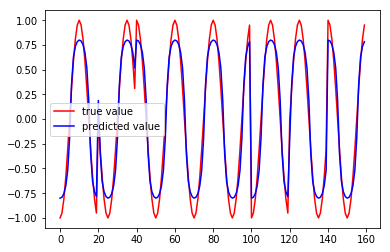

In [41]:
# compare y_true_test and y_test_pred
plt.plot(y_true_test, 'r', label = 'true value')
plt.plot(y_test_pred, 'b', label = 'predicted value')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
# mse of the test prediction
test_loss = mse(y_true_test, y_test_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.019320248725711732


This was pretty good! 

### let's try predicting all the timesteps in a sequence

In [44]:
simpleRNN2 = Sequential([SimpleRNN(units=1 ,input_shape=[None, 1], return_sequences=True)])

In [45]:
optimizer = 'adam'
simpleRNN2.compile(optimizer = optimizer, loss = 'mse' )

In [46]:
patience = 30
min_delta = 0.01

stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True )

In [47]:
verbose = 1
epochs = 300
simpleRNN2.fit(X_train, y_train, batch_size = 50,  epochs = epochs, callbacks = [stopper], 
               verbose = verbose, validation_data = (X_val, y_val))

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 1s 2ms/step - loss: 0.2774 - val_loss: 0.2730
Epoch 2/300
700/700 [==============================] - 0s 634us/step - loss: 0.2696 - val_loss: 0.2657
Epoch 3/300
700/700 [==============================] - 0s 654us/step - loss: 0.2626 - val_loss: 0.2590
Epoch 4/300
700/700 [==============================] - 0s 621us/step - loss: 0.2560 - val_loss: 0.2525
Epoch 5/300
700/700 [==============================] - 0s 627us/step - loss: 0.2496 - val_loss: 0.2463
Epoch 6/300
700/700 [==============================] - 0s 668us/step - loss: 0.2434 - val_loss: 0.2401
Epoch 7/300
700/700 [==============================] - 1s 717us/step - loss: 0.2373 - val_loss: 0.2340
Epoch 8/300
700/700 [==============================] - 0s 594us/step - loss: 0.2312 - val_loss: 0.2280
Epoch 9/300
700/700 [==============================] - 0s 580us/step - loss: 0.2252 - val_loss: 0.2220
Epoch 10/300
700/700 [=======

700/700 [==============================] - 0s 541us/step - loss: 0.0104 - val_loss: 0.0103
Epoch 80/300
700/700 [==============================] - 0s 553us/step - loss: 0.0101 - val_loss: 0.0099
Epoch 81/300
700/700 [==============================] - 0s 576us/step - loss: 0.0098 - val_loss: 0.0096
Epoch 82/300
700/700 [==============================] - 0s 595us/step - loss: 0.0095 - val_loss: 0.0094
Epoch 83/300
700/700 [==============================] - 0s 543us/step - loss: 0.0092 - val_loss: 0.0091
Epoch 84/300
700/700 [==============================] - 0s 533us/step - loss: 0.0090 - val_loss: 0.0089
Epoch 85/300
700/700 [==============================] - 0s 586us/step - loss: 0.0088 - val_loss: 0.0086
Epoch 86/300
700/700 [==============================] - ETA: 0s - loss: 0.008 - 0s 574us/step - loss: 0.0086 - val_loss: 0.0084
Epoch 87/300
700/700 [==============================] - 0s 530us/step - loss: 0.0084 - val_loss: 0.0083
Epoch 88/300
700/700 [==============================]

In [48]:
# test predictions 
y_test_pred = simpleRNN2.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [49]:
s_pred = y_test_pred.reshape(-1,1)
s_true = y_test.reshape(-1,1)
print('prediction shape: {}, true shape: {}'.format(s_pred.shape, s_true.shape))

prediction shape: (8000, 1), true shape: (8000, 1)


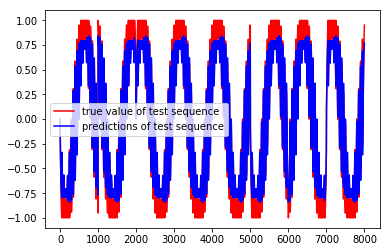

In [50]:
plt.plot(s_true, 'r', label = 'true value of test sequence')
plt.plot(s_pred, 'b', label = 'predictions of test sequence')
plt.legend()
plt.show()

In [51]:
error = mse(s_true, s_pred)
print('test error is: {}'.format(error))

test error is: 0.01333922864659969


Not bad! 

## Simple RNN with multiple units 

In [52]:
# The final output has to be a single number per time-step 
# Just creating a single layer of simpleRNN with n units will produce an n-dimensional vector per time step
# we need to change this into a single number
# one way to do this is pass it through a Dense layer consisting of a single neuron 
# another way is that instead we pass it through another layer of SimpleRNN with just a single neuron
# let's try the latter first
# also, note that our sequence contains negative values but relu only allows postive values to pass through
# thus relu is not a good activation function for the output neuron
simpleRNN3 = Sequential([SimpleRNN(units = 20, activation = 'relu', input_shape= [None, 1] , return_sequences = True), 
                         SimpleRNN(units = 1 , activation = 'tanh', return_sequences = True)])

In [53]:
optimizer = 'adam'
simpleRNN3.compile(optimizer = optimizer, loss = 'mae')

In [54]:
# early stopping 
patience = 30
min_delta = 0.001
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True )

In [55]:
epochs = 500
verbose = 1
simpleRNN3.fit(X_train, y_train, batch_size = 100, epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data=(X_val, y_val) )

Train on 700 samples, validate on 140 samples
Epoch 1/500
700/700 [==============================] - 1s 2ms/step - loss: 0.7350 - val_loss: 0.5892
Epoch 2/500
700/700 [==============================] - 0s 607us/step - loss: 0.3823 - val_loss: 0.2629
Epoch 3/500
700/700 [==============================] - 0s 611us/step - loss: 0.2509 - val_loss: 0.2381
Epoch 4/500
700/700 [==============================] - 0s 637us/step - loss: 0.2305 - val_loss: 0.2200
Epoch 5/500
700/700 [==============================] - 0s 611us/step - loss: 0.2138 - val_loss: 0.2050
Epoch 6/500
700/700 [==============================] - 0s 708us/step - loss: 0.2001 - val_loss: 0.1945
Epoch 7/500
700/700 [==============================] - 1s 991us/step - loss: 0.1916 - val_loss: 0.1882
Epoch 8/500
700/700 [==============================] - 1s 725us/step - loss: 0.1862 - val_loss: 0.1836
Epoch 9/500
700/700 [==============================] - 0s 701us/step - loss: 0.1819 - val_loss: 0.1796
Epoch 10/500
700/700 [=======

700/700 [==============================] - 0s 574us/step - loss: 0.0366 - val_loss: 0.0368
Epoch 80/500
700/700 [==============================] - 0s 623us/step - loss: 0.0366 - val_loss: 0.0369
Epoch 81/500
700/700 [==============================] - 0s 577us/step - loss: 0.0364 - val_loss: 0.0366
Epoch 82/500
700/700 [==============================] - 0s 670us/step - loss: 0.0361 - val_loss: 0.0360
Epoch 83/500
700/700 [==============================] - 0s 573us/step - loss: 0.0357 - val_loss: 0.0356
Epoch 84/500
700/700 [==============================] - 0s 567us/step - loss: 0.0356 - val_loss: 0.0355
Epoch 85/500
700/700 [==============================] - 0s 671us/step - loss: 0.0353 - val_loss: 0.0354
Epoch 86/500
700/700 [==============================] - 0s 547us/step - loss: 0.0351 - val_loss: 0.0350
Epoch 87/500
700/700 [==============================] - 0s 598us/step - loss: 0.0348 - val_loss: 0.0347
Epoch 88/500
700/700 [==============================] - 0s 530us/step - loss:

700/700 [==============================] - 1s 749us/step - loss: 0.0257 - val_loss: 0.0258
Epoch 158/500
700/700 [==============================] - 0s 606us/step - loss: 0.0260 - val_loss: 0.0267
Epoch 159/500
700/700 [==============================] - 0s 604us/step - loss: 0.0265 - val_loss: 0.0260
Epoch 160/500
700/700 [==============================] - 0s 570us/step - loss: 0.0265 - val_loss: 0.0257
Epoch 161/500
700/700 [==============================] - 0s 574us/step - loss: 0.0257 - val_loss: 0.0255
Epoch 162/500
700/700 [==============================] - 0s 568us/step - loss: 0.0254 - val_loss: 0.0253
Epoch 163/500
700/700 [==============================] - 0s 584us/step - loss: 0.0259 - val_loss: 0.0255
Epoch 164/500
700/700 [==============================] - 0s 607us/step - loss: 0.0254 - val_loss: 0.0254
Epoch 165/500
700/700 [==============================] - 0s 567us/step - loss: 0.0252 - val_loss: 0.0252
Epoch 166/500
700/700 [==============================] - 0s 618us/ste

700/700 [==============================] - 0s 563us/step - loss: 0.0215 - val_loss: 0.0214
Epoch 236/500
700/700 [==============================] - 0s 578us/step - loss: 0.0214 - val_loss: 0.0214
Epoch 237/500
700/700 [==============================] - 0s 554us/step - loss: 0.0213 - val_loss: 0.0212
Epoch 238/500
700/700 [==============================] - 0s 556us/step - loss: 0.0212 - val_loss: 0.0218
Epoch 239/500
700/700 [==============================] - 0s 654us/step - loss: 0.0214 - val_loss: 0.0214
Epoch 240/500
700/700 [==============================] - 0s 607us/step - loss: 0.0214 - val_loss: 0.0214
Epoch 241/500
700/700 [==============================] - 0s 549us/step - loss: 0.0212 - val_loss: 0.0213
Epoch 242/500
700/700 [==============================] - 0s 606us/step - loss: 0.0212 - val_loss: 0.0212
Epoch 243/500
700/700 [==============================] - 0s 587us/step - loss: 0.0211 - val_loss: 0.0218
Epoch 244/500
700/700 [==============================] - 0s 632us/ste

700/700 [==============================] - 1s 2ms/step - loss: 0.0185 - val_loss: 0.0188
Epoch 314/500
700/700 [==============================] - 1s 905us/step - loss: 0.0189 - val_loss: 0.0190
Epoch 315/500
700/700 [==============================] - 1s 725us/step - loss: 0.0185 - val_loss: 0.0183
Epoch 316/500
700/700 [==============================] - 1s 754us/step - loss: 0.0183 - val_loss: 0.0183
Epoch 317/500
700/700 [==============================] - 0s 658us/step - loss: 0.0183 - val_loss: 0.0186
Epoch 318/500
700/700 [==============================] - 1s 1ms/step - loss: 0.0183 - val_loss: 0.0191
Epoch 319/500
700/700 [==============================] - 1s 960us/step - loss: 0.0184 - val_loss: 0.0182
Epoch 320/500
700/700 [==============================] - 0s 702us/step - loss: 0.0180 - val_loss: 0.0181
Epoch 321/500
700/700 [==============================] - 0s 662us/step - loss: 0.0180 - val_loss: 0.0176
Epoch 322/500
700/700 [==============================] - 1s 910us/step - 

In [56]:
y_test_pred = simpleRNN3.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [57]:
s_true = y_test.reshape(-1,1)
s_pred = y_test_pred.reshape(-1,1)

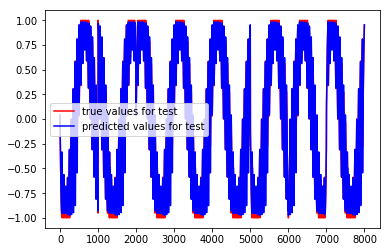

In [58]:
plt.plot(s_true, 'r', label = 'true values for test')
plt.plot(s_pred, 'b', label = 'predicted values for test')
plt.legend()
plt.show()

In [59]:
test_loss = mse(s_true, s_pred)
print('test loss is: {}'.format(test_loss))

test loss is: 0.001650550119133953


very nice!

## Simple RNN with multiple units and Dense layer for output

In [60]:
from keras.layers import Dense

In [61]:
simpleRNN4 = Sequential([SimpleRNN(input_shape = [None, 1], units = 20, activation = 'relu', return_sequences = True), 
                        Dense(units = 1)])

In [62]:
optimizer = 'adam'
simpleRNN4.compile(optimizer = optimizer, loss = 'mae')

In [63]:
patience = 30
min_delta = 0.001
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience , restore_best_weights = True)

In [64]:
epochs = 300
verbose = 1
simpleRNN4.fit(X_train, y_train, batch_size = 100,  epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data = (X_val, y_val) )

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 2s 3ms/step - loss: 0.6543 - val_loss: 0.5792
Epoch 2/300
700/700 [==============================] - 0s 346us/step - loss: 0.5409 - val_loss: 0.4906
Epoch 3/300
700/700 [==============================] - 0s 316us/step - loss: 0.4557 - val_loss: 0.4091
Epoch 4/300
700/700 [==============================] - 0s 332us/step - loss: 0.3762 - val_loss: 0.3323
Epoch 5/300
700/700 [==============================] - 0s 349us/step - loss: 0.2960 - val_loss: 0.2422
Epoch 6/300
700/700 [==============================] - 0s 353us/step - loss: 0.1939 - val_loss: 0.1272
Epoch 7/300
700/700 [==============================] - 0s 333us/step - loss: 0.1005 - val_loss: 0.0989
Epoch 8/300
700/700 [==============================] - 0s 691us/step - loss: 0.0951 - val_loss: 0.0792
Epoch 9/300
700/700 [==============================] - 0s 463us/step - loss: 0.0721 - val_loss: 0.0709
Epoch 10/300
700/700 [=======

700/700 [==============================] - 0s 303us/step - loss: 0.0098 - val_loss: 0.0097
Epoch 80/300
700/700 [==============================] - 0s 368us/step - loss: 0.0094 - val_loss: 0.0091
Epoch 81/300
700/700 [==============================] - 0s 333us/step - loss: 0.0093 - val_loss: 0.0090
Epoch 82/300
700/700 [==============================] - 0s 343us/step - loss: 0.0099 - val_loss: 0.0104
Epoch 83/300
700/700 [==============================] - 0s 403us/step - loss: 0.0110 - val_loss: 0.0109
Epoch 84/300
700/700 [==============================] - 0s 373us/step - loss: 0.0105 - val_loss: 0.0112
Epoch 85/300
700/700 [==============================] - 0s 497us/step - loss: 0.0107 - val_loss: 0.0104
Epoch 86/300
700/700 [==============================] - 0s 570us/step - loss: 0.0106 - val_loss: 0.0115
Epoch 87/300
700/700 [==============================] - 0s 339us/step - loss: 0.0107 - val_loss: 0.0092
Epoch 88/300
700/700 [==============================] - 0s 447us/step - loss:

700/700 [==============================] - 0s 435us/step - loss: 0.0070 - val_loss: 0.0068
Epoch 158/300
700/700 [==============================] - 0s 427us/step - loss: 0.0059 - val_loss: 0.0056
Epoch 159/300
700/700 [==============================] - 0s 480us/step - loss: 0.0058 - val_loss: 0.0054
Epoch 160/300
700/700 [==============================] - 0s 429us/step - loss: 0.0066 - val_loss: 0.0079
Epoch 161/300
700/700 [==============================] - 0s 387us/step - loss: 0.0063 - val_loss: 0.0067
Epoch 162/300
700/700 [==============================] - 0s 377us/step - loss: 0.0061 - val_loss: 0.0052
Epoch 163/300
700/700 [==============================] - 0s 355us/step - loss: 0.0062 - val_loss: 0.0052
Epoch 164/300
700/700 [==============================] - 0s 504us/step - loss: 0.0056 - val_loss: 0.0053
Epoch 165/300
700/700 [==============================] - 0s 378us/step - loss: 0.0063 - val_loss: 0.0057
Epoch 166/300
700/700 [==============================] - 0s 382us/ste

In [65]:
y_test_pred = simpleRNN4.predict(X_test)
y_test_pred.shape

(160, 50, 1)

In [66]:
s_true = y_test.reshape(-1,1)
s_pred = y_test_pred.reshape(-1,1)

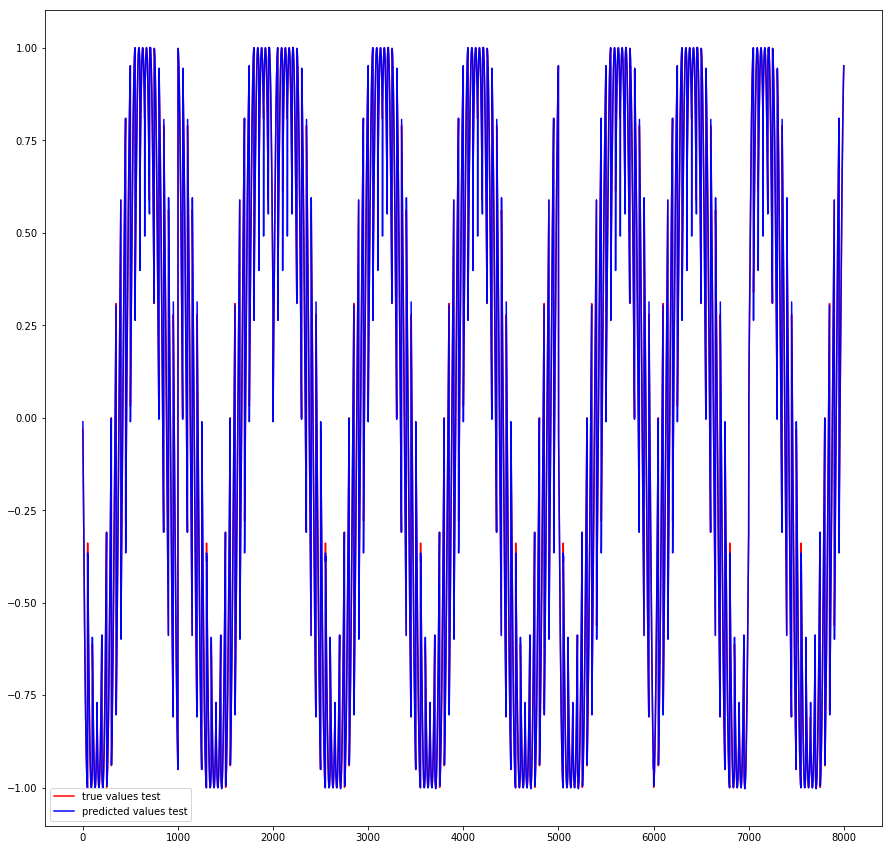

In [67]:
plt.figure(figsize = (15,15))
plt.plot(s_true, 'r', label = 'true values test')
plt.plot(s_pred, 'b', label = 'predicted values test')
plt.legend()
plt.show()

the predicted value seems to overlap with the true values perfectly!

In [68]:
test_loss = mse(s_true, s_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.000860609628530197


This is quite a low error! Wow!

## Stacking RNN layers

In [69]:
# To stack up RNNs the lower layer necessarily have to output a sequence that can be fed into the upper layer, therefore
# we need to set return_sequences = True
simpleRNN4 = Sequential([SimpleRNN(units = 20, input_shape = [None, 1], return_sequences = True), 
                         SimpleRNN(units = 20, return_sequences = True), 
                         Dense(units = 1) ])

In [70]:
optimizer = 'adam'
simpleRNN4.compile(optimizer = optimizer, loss = 'mse')

In [71]:
# Early Stopping
patience = 30
min_delta = 0.001
stopper = EarlyStopping(monitor = 'val_loss', min_delta = min_delta, patience = patience, restore_best_weights = True)

In [72]:
epochs = 300
verbose = 1
simpleRNN4.fit(X_train, y_train, batch_size = 100, epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data = (X_val, y_val)  )

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 2s 3ms/step - loss: 0.3214 - val_loss: 0.1742
Epoch 2/300
700/700 [==============================] - 0s 584us/step - loss: 0.1450 - val_loss: 0.0828
Epoch 3/300
700/700 [==============================] - 0s 658us/step - loss: 0.0553 - val_loss: 0.0458
Epoch 4/300
700/700 [==============================] - 0s 620us/step - loss: 0.0456 - val_loss: 0.0368
Epoch 5/300
700/700 [==============================] - 0s 668us/step - loss: 0.0313 - val_loss: 0.0292
Epoch 6/300
700/700 [==============================] - 0s 650us/step - loss: 0.0279 - val_loss: 0.0241
Epoch 7/300
700/700 [==============================] - 1s 715us/step - loss: 0.0220 - val_loss: 0.0206
Epoch 8/300
700/700 [==============================] - 0s 674us/step - loss: 0.0195 - val_loss: 0.0177
Epoch 9/300
700/700 [==============================] - 1s 732us/step - loss: 0.0167 - val_loss: 0.0157
Epoch 10/300
700/700 [=======

In [89]:
y_test_predict = simpleRNN4.predict(X_test)

In [90]:
s_pred = y_test_predict.reshape(-1,1)
s_true = y_test.reshape(-1,1)

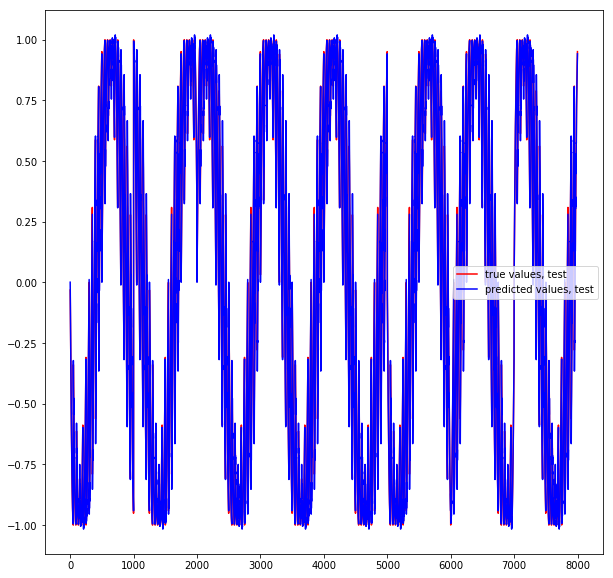

In [91]:
plt.figure(figsize = (10,10))
plt.plot(s_true, 'r', label = 'true values, test')
plt.plot(s_pred, 'b', label = 'predicted values, test')
plt.legend()
plt.show()

In [92]:
test_loss = mse(s_true, s_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.0008553698398483834


## predicting the next 10 values

One way is to just repeatedly join the output from the RNN to the new input. Let's try this:

We will also for now set return_sequences = False in the final RNN layer so that we only return the value at the last time step of our input sequence 

In [136]:
simpleRNN5 = Sequential([SimpleRNN(units = 20, input_shape = [None, 1], return_sequences = False), Dense(units = 1)])

In [137]:
optimizer = 'adam'
simpleRNN5.compile(optimizer = optimizer, loss = 'mse')

In [138]:
patience = 30
min_delta = 0.001
stopper = EarlyStopping( monitor = 'val_loss', min_delta = 0.001, patience = patience, restore_best_weights = True)

Rather than regenerating our data to obtain the predictions for next 10 time_steps in the series, we will train for the first 40 time_steps and use the remain 10 values to compare with our predictions

In [127]:
train_data = X_train[:, :40]
val_data = X_val[:, :40]
test_data = X_test[:, :40]

In [128]:
y_train_true = X_train[:, 40]
y_val_true = X_val[:, 40]
y_test_true = X_test[:, 40]

Checking that the arrays contain the right values at the right places

In [133]:
X_train[15,:41].reshape(1,-1)

array([[1.        , 0.99950656, 0.99802673, 0.99556196, 0.9921147 ,
        0.98768834, 0.98228725, 0.97591676, 0.96858316, 0.96029369,
        0.95105652, 0.94088077, 0.92977649, 0.91775463, 0.90482705,
        0.89100652, 0.87630668, 0.86074203, 0.84432793, 0.82708057,
        0.80901699, 0.79015501, 0.77051324, 0.75011107, 0.72896863,
        0.70710678, 0.68454711, 0.66131187, 0.63742399, 0.61290705,
        0.58778525, 0.56208338, 0.53582679, 0.50904142, 0.48175367,
        0.4539905 , 0.42577929, 0.39714789, 0.36812455, 0.33873792,
        0.30901699]])

In [134]:
train_data[15,:].reshape(1,-1)

array([[1.        , 0.99950656, 0.99802673, 0.99556196, 0.9921147 ,
        0.98768834, 0.98228725, 0.97591676, 0.96858316, 0.96029369,
        0.95105652, 0.94088077, 0.92977649, 0.91775463, 0.90482705,
        0.89100652, 0.87630668, 0.86074203, 0.84432793, 0.82708057,
        0.80901699, 0.79015501, 0.77051324, 0.75011107, 0.72896863,
        0.70710678, 0.68454711, 0.66131187, 0.63742399, 0.61290705,
        0.58778525, 0.56208338, 0.53582679, 0.50904142, 0.48175367,
        0.4539905 , 0.42577929, 0.39714789, 0.36812455, 0.33873792]])

In [135]:
y_train_true[15]

array([0.30901699])

In [139]:
epochs = 300
batch_size = 100
verbose = 1
simpleRNN5.fit(train_data, y_train_true, batch_size = batch_size, epochs = epochs, verbose = verbose, 
               callbacks = [stopper], validation_data=(val_data, y_val_true) )

Train on 700 samples, validate on 140 samples
Epoch 1/300
700/700 [==============================] - 2s 3ms/step - loss: 0.0292 - val_loss: 0.0070
Epoch 2/300
700/700 [==============================] - 0s 251us/step - loss: 0.0059 - val_loss: 0.0047
Epoch 3/300
700/700 [==============================] - 0s 265us/step - loss: 0.0040 - val_loss: 0.0015
Epoch 4/300
700/700 [==============================] - 0s 237us/step - loss: 0.0011 - val_loss: 9.8855e-04
Epoch 5/300
700/700 [==============================] - 0s 251us/step - loss: 7.4293e-04 - val_loss: 8.2603e-04
Epoch 6/300
700/700 [==============================] - 0s 226us/step - loss: 7.2971e-04 - val_loss: 5.0293e-04
Epoch 7/300
700/700 [==============================] - 0s 254us/step - loss: 5.0586e-04 - val_loss: 3.5686e-04
Epoch 8/300
700/700 [==============================] - 0s 288us/step - loss: 3.5866e-04 - val_loss: 3.4034e-04
Epoch 9/300
700/700 [==============================] - 0s 237us/step - loss: 3.2368e-04 - val_lo

In [142]:
y_test_pred = simpleRNN5.predict(test_data)

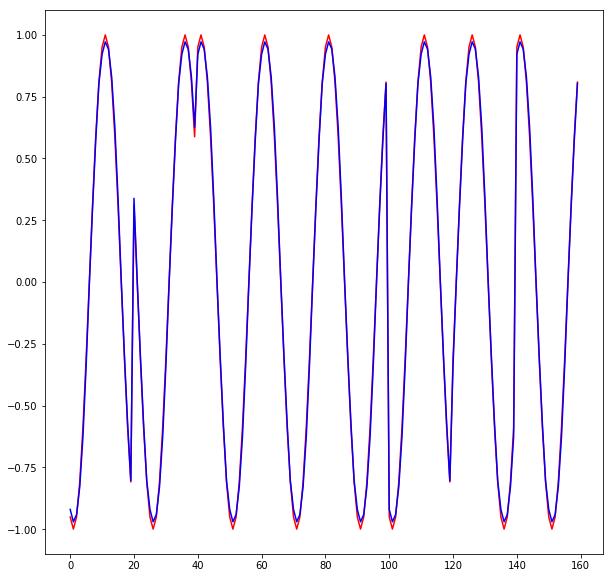

In [143]:
plt.figure(figsize = (10,10))
plt.plot(y_test_true, 'r', label = 'true values, test')
plt.plot(y_test_pred, 'b', label = 'predicted values, test')
plt.show()

In [144]:
test_loss = mse(y_test_true, y_test_pred)
print('test loss: {}'.format(test_loss))

test loss: 0.0005029303133273082


In [97]:
# using this to predict the next 10 values

In [146]:
steps = 10
test_set = test_data
for itr in range(steps):
    X = test_set[:, itr: ]
    y = simpleRNN5.predict(X)
    test_set = np.concatenate((test_set, y.reshape(-1,1,1)), axis = 1)
    #predictions = np.concatenate((predictions, y.reshape(-1,1,1)), axis =1)

In [147]:
test_set.shape

(160, 50, 1)

In [148]:
predictions = test_set[:, 40:]
predictions.shape

(160, 10, 1)

In [149]:
predictions.reshape(-1,10)[:2]

array([[-0.92030525, -0.91167837, -0.90754908, -0.90509969, -0.89309591,
        -0.88182908, -0.87529314, -0.87082082, -0.86298966, -0.85508633],
       [-0.97043294, -0.95502132, -0.94484669, -0.93695503, -0.92069453,
        -0.90605456, -0.89647442, -0.88914245, -0.8790822 , -0.86938518]])

In [153]:
s_pred = predictions. reshape(-1)
s_true = X_test[:,40:].reshape(-1)

In [156]:
net_test_loss = mse(s_true, s_pred)
print(' net test loss over {} timesteps: {}'.format(10, net_test_loss))

 net test loss over 10 timesteps: 0.009080196250282226


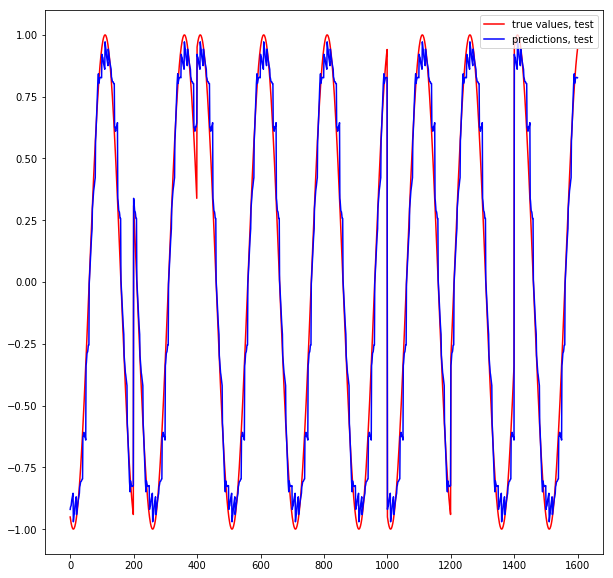

In [159]:
plt.figure(figsize = (10,10))
plt.plot(s_true, 'r', label = 'true values, test')
plt.plot(s_pred, 'b', label = 'predictions, test')
plt.legend()
plt.show()

In [160]:
# time step wise error
errors = []
for itr in range(10):
    pred = predictions[:,itr]
    true_val = X_test[:, 40+itr]
    loss = mse(true_val, pred )
    errors.append(loss)

In [161]:
errors

[0.0005029303133273082,
 0.0013035439208229265,
 0.0021093797140138934,
 0.0030258717617391165,
 0.005332269953976956,
 0.008470906680590539,
 0.011557130745863448,
 0.014621416907476889,
 0.019173359600010383,
 0.024705152905000805]

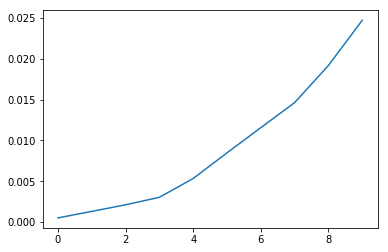

In [162]:
plt.plot(errors)

As expected, we see that the error increases with the number of timesteps!